In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42

In [2]:
orthogroups = pd.read_csv(
    "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Orthology_Tables/Finalized_Orthology_Nov_15/Reformatted_orthogroup_table.csv"
)

In [3]:
orthogroups

,Gene Name,Orthogroup,Species
0,Solyc04g018150,OG0000003,SlycHeinz4.0
1,Solyc02g030550,OG0000004,SlycHeinz4.0
2,Solyc01g066020,OG0000005,SlycHeinz4.0
3,Solyc05g024370,OG0000005,SlycHeinz4.0
4,Solyc11g011080,OG0000005,SlycHeinz4.0
...,...,...,...
877265,Solvio1_09g012150,OG0044291,Solvio1_1.1.2
877266,Solvio1_11g011120,OG0044292,Solvio1_1.1.2
877267,Solvio1_11g018310,OG0044292,Solvio1_1.1.2
877268,Solvio1_11g011570,OG0044293,Solvio1_1.1.2


In [4]:
orthogroups = orthogroups.loc[~orthogroups['Species'].isin(['Smel4.1','Solpse1_1.1.2','SlycHeinz4.0'])]

In [5]:
counts = orthogroups.groupby(['Orthogroup', 'Species']).count()
counts = counts.rename(columns = {'Gene Name':'Num Genes'})

In [6]:
counts = counts.reset_index()
counts

,Orthogroup,Species,Num Genes
0,OG0000000,Solabu2_1.1.2,72
1,OG0000000,Solaet3_1.5.2,79
2,OG0000000,Solame3_1.1.2,41
3,OG0000000,Solang8_1.1.2,92
4,OG0000000,Solcan1_1.1.2,78
...,...,...,...
579171,OG0044289,Solvio1_1.1.2,2
579172,OG0044290,Solvio1_1.1.2,2
579173,OG0044291,Solvio1_1.1.2,2
579174,OG0044292,Solvio1_1.1.2,2


In [7]:
counts['Num Genes'] = counts['Num Genes'].astype(int)
counts

,Orthogroup,Species,Num Genes
0,OG0000000,Solabu2_1.1.2,72
1,OG0000000,Solaet3_1.5.2,79
2,OG0000000,Solame3_1.1.2,41
3,OG0000000,Solang8_1.1.2,92
4,OG0000000,Solcan1_1.1.2,78
...,...,...,...
579171,OG0044289,Solvio1_1.1.2,2
579172,OG0044290,Solvio1_1.1.2,2
579173,OG0044291,Solvio1_1.1.2,2
579174,OG0044292,Solvio1_1.1.2,2


In [8]:
counts_mode = counts[['Orthogroup','Num Genes']].groupby('Orthogroup')['Num Genes'].agg(lambda x: x.value_counts().index[0])
counts_mode

Orthogroup
OG0000000    72
OG0000001     8
OG0000002    29
OG0000003    19
OG0000004     2
             ..
OG0044289     2
OG0044290     2
OG0044291     2
OG0044292     2
OG0044293     2
Name: Num Genes, Length: 44225, dtype: int64

In [9]:
counts_median = counts.groupby('Orthogroup').median()
counts_median

,Num Genes
Orthogroup,
OG0000000,77.0
OG0000001,36.0
OG0000002,29.0
OG0000003,21.0
OG0000004,16.0
...,...
OG0044289,2.0
OG0044290,2.0
OG0044291,2.0


In [10]:
counts['Orthogroup'].unique()

array(['OG0000000', 'OG0000001', 'OG0000002', ..., 'OG0044291',
       'OG0044292', 'OG0044293'], dtype=object)

In [11]:
double_counts = counts[['Orthogroup','Species']].groupby('Orthogroup').count()
double_counts

,Species
Orthogroup,
OG0000000,23
OG0000001,23
OG0000002,23
OG0000003,22
OG0000004,23
...,...
OG0044289,1
OG0044290,1
OG0044291,1


<AxesSubplot:xlabel='Species', ylabel='Count'>

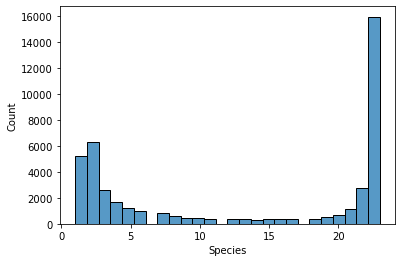

In [12]:
sns.histplot(data = double_counts, x = 'Species', bins = 26)

In [13]:
double_counts.loc[double_counts['Species']>10]

,Species
Orthogroup,
OG0000000,23
OG0000001,23
OG0000002,23
OG0000003,22
OG0000004,23
...,...
OG0025241,11
OG0025243,11
OG0025245,11


In [14]:
tissue_directory = pd.read_csv(
    "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Final_species_RNA_data/sample_to_tissue.csv",
    sep="\t",
)
tissue_directory = tissue_directory.replace(
    {
        "apices": "Apex",
        "coty": "Cotyledon",
        "In": "Inflorescence",
        "leaves": "Leaf",
        "hypo": "Hypocotyl",
        "pric": "Prickle",
        "fruit": "Fruit",
        "flower": "Flower",
        "meristem": "Meristem",
    }
)
tissue_directory

,Species,Sample,Tissue,Sample Name,Total Reads,% Uniquely mapped,% multimapped,% unmapped,Fastq Path Paried Read1,Fastq Path Paired Read 2
0,abutiloides,Sabu2,Apex,Sabu2_apices_2_S11,46869976.0,88.2758,3.39319,8.33102,/grid/lippman/data/pansol/abutiloides/Sabu2/da...,/grid/lippman/data/pansol/abutiloides/Sabu2/da...
1,abutiloides,Sabu2,Apex,Sabu2_apices_3_S17,42814613.0,86.7834,3.17339,10.04320,/grid/lippman/data/pansol/abutiloides/Sabu2/da...,/grid/lippman/data/pansol/abutiloides/Sabu2/da...
2,aethiopicum,Saet3,Apex,Saet3_apices_1_S1,31885899.0,88.5922,4.63972,6.76812,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
3,aethiopicum,Saet3,Apex,Saet3_apices_2_S2,31235923.0,88.5767,4.57639,6.84692,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
4,aethiopicum,Saet3,Apex,Saet3_apices_3_S3,31476966.0,88.9584,4.59573,6.44585,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
...,...,...,...,...,...,...,...,...,...,...
258,lycopercicum,M82,Meristem,M82_SIM2,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
259,lycopercicum,M82,Meristem,M82_SYM1,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
260,lycopercicum,M82,Meristem,M82_SYM2,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
261,lycopercicum,M82,Meristem,M82_TM1,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...


In [15]:
sensible_species_names = {
    "Solabu2_1.1.2": "abutiloides",
    "Solaet3_1.5.2": "aethiopicum",
    "Solame3_1.1.2": "americanum",
    "Solang8_1.1.2": "anguivi",
    "Solcan1_1.1.2": "candidum",
    "Solcit1_1.1.2": "citrullifolium",
    "Solcle2_1.2.2": "cleistogamum",
    "Soletu1_1.2.2": "etuberosum",
    "Solgig1_1.2.2": "giganteum",
    "Solhav1_1.2.2": "havanense",
    "Solins1_1.1.2": "insanum",
    "Sollin1_1.2.2": "linearifolium",
    "Solmac3_1.5.2": "macrocarpon",
    "Solmam1_1.1.2": "mammosum",
    "Solmur2hap1_1.3.2" : "muricatum1",
    "Solmur2hap2_1.3.2": "muricatum2",
    "Solpri1_1.3.2": "prinophyllum",
    "Solpse1_1.1.2.3.2": "pseudolulo",
    "Solqui2_1.3.2": "quitoense",
    "Solrob1_1.2.2": "robustum",
    "Solstr1_1.1.2": "stramoniifolium",
    "Soltor1_1.1.2": "torvum",
    "Solvio1_1.1.2": "violaceum",
    "SollycM82_1.0.2": "lycopersicum"
}

In [16]:
sample_names = tissue_directory[['Species','Sample']].drop_duplicates()
sample_names = sample_names[:-1]
sample_names

,Species,Sample
0,abutiloides,Sabu2
2,aethiopicum,Saet3
23,americanum,Same3
38,anguivi,Sang8
54,candidum,Scan1
70,citrullifolium,Scit1
87,cleistogamum,Scle2
99,etuberosum,Setu1
106,giganteum,Sgig1
109,havanense,Shav1


In [17]:
gene_ortho_map = orthogroups.replace(sensible_species_names)
gene_ortho_map

,Gene Name,Orthogroup,Species
67797,Solabu2_01g006620,OG0000000,abutiloides
67798,Solabu2_01g007940,OG0000000,abutiloides
67799,Solabu2_01g008200,OG0000000,abutiloides
67800,Solabu2_01g008970,OG0000000,abutiloides
67801,Solabu2_01g011190,OG0000000,abutiloides
...,...,...,...
877265,Solvio1_09g012150,OG0044291,violaceum
877266,Solvio1_11g011120,OG0044292,violaceum
877267,Solvio1_11g018310,OG0044292,violaceum
877268,Solvio1_11g011570,OG0044293,violaceum


In [18]:
ortho_expression_frame = pd.DataFrame( index = counts['Orthogroup'].unique())
ortho_expression_frame

""
OG0000000
OG0000001
OG0000002
OG0000003
OG0000004
...
OG0044289
OG0044290
OG0044291
OG0044292


In [361]:
info_frame = double_counts
info_frame

,Species,Mode Number of Genes in Each Species,Median Genes Lost,Mean Genes Lost,Mean Expression,Percent Genes Lost,Specieswise Percent Genes Lost,Cumulative Genes Lost,Decile
Orthogroup,,,,,,,,,
OG0000000,23,72,-0.0,12.695652,0.810847,0.176329,2.322290,292.0,1.0
OG0000001,23,8,-0.0,0.956522,0.018016,0.119565,0.591304,22.0,1.0
OG0000002,23,29,-0.0,4.826087,0.000428,0.166417,0.821101,111.0,1.0
OG0000003,22,19,-0.0,5.347826,0.517587,0.281465,1.451102,123.0,1.0
OG0000004,23,2,-0.0,0.000000,0.421046,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
OG0044289,1,2,NaN,NaN,0.000000,NaN,NaN,0.0,NaN
OG0044290,1,2,NaN,NaN,0.000000,NaN,NaN,0.0,NaN
OG0044291,1,2,NaN,NaN,0.000000,NaN,NaN,0.0,NaN


In [362]:
counts_mode

Orthogroup
OG0000000    72
OG0000001     8
OG0000002    29
OG0000003    19
OG0000004     2
             ..
OG0044289     2
OG0044290     2
OG0044291     2
OG0044292     2
OG0044293     2
Name: Num Genes, Length: 44225, dtype: int64

In [363]:
info_frame['Mode Number of Genes in Each Species'] = counts_mode
info_frame

,Species,Mode Number of Genes in Each Species,Median Genes Lost,Mean Genes Lost,Mean Expression,Percent Genes Lost,Specieswise Percent Genes Lost,Cumulative Genes Lost,Decile
Orthogroup,,,,,,,,,
OG0000000,23,72,-0.0,12.695652,0.810847,0.176329,2.322290,292.0,1.0
OG0000001,23,8,-0.0,0.956522,0.018016,0.119565,0.591304,22.0,1.0
OG0000002,23,29,-0.0,4.826087,0.000428,0.166417,0.821101,111.0,1.0
OG0000003,22,19,-0.0,5.347826,0.517587,0.281465,1.451102,123.0,1.0
OG0000004,23,2,-0.0,0.000000,0.421046,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
OG0044289,1,2,NaN,NaN,0.000000,NaN,NaN,0.0,NaN
OG0044290,1,2,NaN,NaN,0.000000,NaN,NaN,0.0,NaN
OG0044291,1,2,NaN,NaN,0.000000,NaN,NaN,0.0,NaN


In [364]:
counts_clean = counts.replace(sensible_species_names)
counts_clean[100:160].head()

,Orthogroup,Species,Num Genes
100,OG0000004,havanense,2
101,OG0000004,insanum,62
102,OG0000004,linearifolium,52
103,OG0000004,lycopersicum,2
104,OG0000004,macrocarpon,53


In [365]:
all_species_num_genes = counts_clean.pivot(columns = 'Species', index = 'Orthogroup',values = 'Num Genes').fillna(0)
all_species_num_genes

Species,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,macrocarpon,mammosum,muricatum1,muricatum2,prinophyllum,quitoense,robustum,stramoniifolium,torvum,violaceum
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000000,72.0,79.0,41.0,92.0,78.0,105.0,77.0,8.0,79.0,72.0,...,69.0,67.0,13.0,12.0,78.0,73.0,88.0,89.0,75.0,89.0
OG0000001,1.0,58.0,5.0,26.0,36.0,32.0,43.0,12.0,2.0,8.0,...,36.0,50.0,62.0,62.0,8.0,34.0,73.0,56.0,35.0,46.0
OG0000002,34.0,38.0,28.0,38.0,37.0,12.0,17.0,21.0,2.0,31.0,...,12.0,29.0,30.0,25.0,18.0,30.0,24.0,33.0,32.0,139.0
OG0000003,3.0,54.0,6.0,50.0,23.0,13.0,51.0,5.0,51.0,4.0,...,57.0,14.0,2.0,2.0,64.0,19.0,18.0,19.0,40.0,53.0
OG0000004,9.0,54.0,3.0,47.0,16.0,12.0,30.0,7.0,52.0,2.0,...,53.0,12.0,2.0,3.0,47.0,11.0,15.0,17.0,39.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
OG0044290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
OG0044291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [366]:
genes_present = all_species_num_genes>0
genes_present = genes_present.sum(axis =1 )

#all_species_num_genes = all_species_num_genes.loc[genes_present>9]

In [367]:
all_species_num_genes.T

Orthogroup,OG0000000,OG0000001,OG0000002,OG0000003,OG0000004,OG0000005,OG0000006,OG0000007,OG0000008,OG0000009,...,OG0044284,OG0044285,OG0044286,OG0044287,OG0044288,OG0044289,OG0044290,OG0044291,OG0044292,OG0044293
Species,,,,,,,,,,,,,,,,,,,,,
abutiloides,72.0,1.0,34.0,3.0,9.0,37.0,25.0,23.0,23.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aethiopicum,79.0,58.0,38.0,54.0,54.0,48.0,31.0,45.0,37.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
americanum,41.0,5.0,28.0,6.0,3.0,29.0,19.0,29.0,16.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anguivi,92.0,26.0,38.0,50.0,47.0,39.0,36.0,50.0,43.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
candidum,78.0,36.0,37.0,23.0,16.0,20.0,40.0,13.0,23.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
citrullifolium,105.0,32.0,12.0,13.0,12.0,7.0,13.0,6.0,18.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cleistogamum,77.0,43.0,17.0,51.0,30.0,19.0,14.0,16.0,30.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
etuberosum,8.0,12.0,21.0,5.0,7.0,9.0,10.0,8.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
giganteum,79.0,2.0,2.0,51.0,52.0,16.0,21.0,28.0,34.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [368]:
info_frame['Mode Number of Genes in Each Species']

Orthogroup
OG0000000    72
OG0000001     8
OG0000002    29
OG0000003    19
OG0000004     2
             ..
OG0044289     2
OG0044290     2
OG0044291     2
OG0044292     2
OG0044293     2
Name: Mode Number of Genes in Each Species, Length: 44225, dtype: int64

In [369]:
info_frame = info_frame.loc[info_frame.index.isin(all_species_num_genes.index)]
info_frame

,Species,Mode Number of Genes in Each Species,Median Genes Lost,Mean Genes Lost,Mean Expression,Percent Genes Lost,Specieswise Percent Genes Lost,Cumulative Genes Lost,Decile
Orthogroup,,,,,,,,,
OG0000000,23,72,-0.0,12.695652,0.810847,0.176329,2.322290,292.0,1.0
OG0000001,23,8,-0.0,0.956522,0.018016,0.119565,0.591304,22.0,1.0
OG0000002,23,29,-0.0,4.826087,0.000428,0.166417,0.821101,111.0,1.0
OG0000003,22,19,-0.0,5.347826,0.517587,0.281465,1.451102,123.0,1.0
OG0000004,23,2,-0.0,0.000000,0.421046,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
OG0044289,1,2,NaN,NaN,0.000000,NaN,NaN,0.0,NaN
OG0044290,1,2,NaN,NaN,0.000000,NaN,NaN,0.0,NaN
OG0044291,1,2,NaN,NaN,0.000000,NaN,NaN,0.0,NaN


In [370]:
all_species_genes_lost = all_species_num_genes.T - info_frame['Mode Number of Genes in Each Species']

In [371]:
all_species_genes_lost = all_species_genes_lost.clip(upper = 0).T
all_species_genes_lost

Species,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,macrocarpon,mammosum,muricatum1,muricatum2,prinophyllum,quitoense,robustum,stramoniifolium,torvum,violaceum
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000000,0.0,0.0,-31.0,0.0,0.0,0.0,0.0,-64.0,0.0,0.0,...,-3.0,-5.0,-59.0,-60.0,0.0,0.0,0.0,0.0,0.0,0.0
OG0000001,-7.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,-6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OG0000002,0.0,0.0,-1.0,0.0,0.0,-17.0,-12.0,-8.0,-27.0,0.0,...,-17.0,0.0,0.0,-4.0,-11.0,0.0,-5.0,0.0,0.0,0.0
OG0000003,-16.0,0.0,-13.0,0.0,0.0,-6.0,0.0,-14.0,0.0,-15.0,...,0.0,-5.0,-17.0,-17.0,0.0,0.0,-1.0,0.0,0.0,0.0
OG0000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0
OG0044290,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0
OG0044291,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0


In [372]:
all_species_genes_lost = all_species_genes_lost*-1
all_species_genes_lost

Species,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,macrocarpon,mammosum,muricatum1,muricatum2,prinophyllum,quitoense,robustum,stramoniifolium,torvum,violaceum
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000000,-0.0,-0.0,31.0,-0.0,-0.0,-0.0,-0.0,64.0,-0.0,-0.0,...,3.0,5.0,59.0,60.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
OG0000001,7.0,-0.0,3.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
OG0000002,-0.0,-0.0,1.0,-0.0,-0.0,17.0,12.0,8.0,27.0,-0.0,...,17.0,-0.0,-0.0,4.0,11.0,-0.0,5.0,-0.0,-0.0,-0.0
OG0000003,16.0,-0.0,13.0,-0.0,-0.0,6.0,-0.0,14.0,-0.0,15.0,...,-0.0,5.0,17.0,17.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0
OG0000004,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-0.0
OG0044290,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-0.0
OG0044291,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-0.0


In [373]:
all_species_genes_lost.median(axis= 1)

Orthogroup
OG0000000   -0.0
OG0000001   -0.0
OG0000002   -0.0
OG0000003   -0.0
OG0000004   -0.0
            ... 
OG0044289    2.0
OG0044290    2.0
OG0044291    2.0
OG0044292    2.0
OG0044293    2.0
Length: 44225, dtype: float64

In [374]:
all_species_num_genes

Species,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,macrocarpon,mammosum,muricatum1,muricatum2,prinophyllum,quitoense,robustum,stramoniifolium,torvum,violaceum
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000000,72.0,79.0,41.0,92.0,78.0,105.0,77.0,8.0,79.0,72.0,...,69.0,67.0,13.0,12.0,78.0,73.0,88.0,89.0,75.0,89.0
OG0000001,1.0,58.0,5.0,26.0,36.0,32.0,43.0,12.0,2.0,8.0,...,36.0,50.0,62.0,62.0,8.0,34.0,73.0,56.0,35.0,46.0
OG0000002,34.0,38.0,28.0,38.0,37.0,12.0,17.0,21.0,2.0,31.0,...,12.0,29.0,30.0,25.0,18.0,30.0,24.0,33.0,32.0,139.0
OG0000003,3.0,54.0,6.0,50.0,23.0,13.0,51.0,5.0,51.0,4.0,...,57.0,14.0,2.0,2.0,64.0,19.0,18.0,19.0,40.0,53.0
OG0000004,9.0,54.0,3.0,47.0,16.0,12.0,30.0,7.0,52.0,2.0,...,53.0,12.0,2.0,3.0,47.0,11.0,15.0,17.0,39.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
OG0044290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
OG0044291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [375]:
all_species_genes_lost

Species,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,macrocarpon,mammosum,muricatum1,muricatum2,prinophyllum,quitoense,robustum,stramoniifolium,torvum,violaceum
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000000,-0.0,-0.0,31.0,-0.0,-0.0,-0.0,-0.0,64.0,-0.0,-0.0,...,3.0,5.0,59.0,60.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
OG0000001,7.0,-0.0,3.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
OG0000002,-0.0,-0.0,1.0,-0.0,-0.0,17.0,12.0,8.0,27.0,-0.0,...,17.0,-0.0,-0.0,4.0,11.0,-0.0,5.0,-0.0,-0.0,-0.0
OG0000003,16.0,-0.0,13.0,-0.0,-0.0,6.0,-0.0,14.0,-0.0,15.0,...,-0.0,5.0,17.0,17.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0
OG0000004,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-0.0
OG0044290,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-0.0
OG0044291,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-0.0


In [376]:
all_species_num_genes

Species,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,macrocarpon,mammosum,muricatum1,muricatum2,prinophyllum,quitoense,robustum,stramoniifolium,torvum,violaceum
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000000,72.0,79.0,41.0,92.0,78.0,105.0,77.0,8.0,79.0,72.0,...,69.0,67.0,13.0,12.0,78.0,73.0,88.0,89.0,75.0,89.0
OG0000001,1.0,58.0,5.0,26.0,36.0,32.0,43.0,12.0,2.0,8.0,...,36.0,50.0,62.0,62.0,8.0,34.0,73.0,56.0,35.0,46.0
OG0000002,34.0,38.0,28.0,38.0,37.0,12.0,17.0,21.0,2.0,31.0,...,12.0,29.0,30.0,25.0,18.0,30.0,24.0,33.0,32.0,139.0
OG0000003,3.0,54.0,6.0,50.0,23.0,13.0,51.0,5.0,51.0,4.0,...,57.0,14.0,2.0,2.0,64.0,19.0,18.0,19.0,40.0,53.0
OG0000004,9.0,54.0,3.0,47.0,16.0,12.0,30.0,7.0,52.0,2.0,...,53.0,12.0,2.0,3.0,47.0,11.0,15.0,17.0,39.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
OG0044290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
OG0044291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [377]:
#percent_genes_lost_per_species = all_species_num_genes /all_species_genes_lost
percent_genes_lost_per_species = (all_species_genes_lost) /(all_species_num_genes)

In [378]:
percent_genes_lost_per_species = percent_genes_lost_per_species.replace(np.inf,np.nan)

In [379]:
percent_genes_lost_per_species

Species,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,macrocarpon,mammosum,muricatum1,muricatum2,prinophyllum,quitoense,robustum,stramoniifolium,torvum,violaceum
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000000,-0.000000,-0.0,0.756098,-0.0,-0.0,-0.000000,-0.000000,8.000000,-0.0,-0.00,...,0.043478,0.074627,4.538462,5.00,-0.000000,-0.0,-0.000000,-0.0,-0.0,-0.0
OG0000001,7.000000,-0.0,0.600000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,3.0,-0.00,...,-0.000000,-0.000000,-0.000000,-0.00,-0.000000,-0.0,-0.000000,-0.0,-0.0,-0.0
OG0000002,-0.000000,-0.0,0.035714,-0.0,-0.0,1.416667,0.705882,0.380952,13.5,-0.00,...,1.416667,-0.000000,-0.000000,0.16,0.611111,-0.0,0.208333,-0.0,-0.0,-0.0
OG0000003,5.333333,-0.0,2.166667,-0.0,-0.0,0.461538,-0.000000,2.800000,-0.0,3.75,...,-0.000000,0.357143,8.500000,8.50,-0.000000,-0.0,0.055556,-0.0,-0.0,-0.0
OG0000004,-0.000000,-0.0,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,-0.00,...,-0.000000,-0.000000,-0.000000,-0.00,-0.000000,-0.0,-0.000000,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0
OG0044290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0
OG0044291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0


In [380]:
percent_genes_lost_per_species.mean(axis= 1)

Orthogroup
OG0000000    2.322290
OG0000001    0.591304
OG0000002    0.821101
OG0000003    1.451102
OG0000004    0.000000
               ...   
OG0044289    0.000000
OG0044290    0.000000
OG0044291    0.000000
OG0044292    0.000000
OG0044293    0.000000
Length: 44225, dtype: float64

In [381]:
info_frame['Median Genes Lost'] = all_species_genes_lost.median(axis= 1)
info_frame['Mean Genes Lost'] = all_species_genes_lost.mean(axis= 1)
info_frame['Specieswise Percent Genes Lost'] = percent_genes_lost_per_species.mean(axis= 1)
info_frame['Cumulative Genes Lost'] = all_species_genes_lost.sum(axis =1)

In [382]:
for species in sample_names.iterrows():
    sample_id = species[1][1]
    species_id = species[1][0]
    file_name = (
        "/data/suresh/pansol/counts/"
        + sample_id
        + "_TPM_counts.csv"
        )
    current_rna_file = pd.read_csv(file_name)
    current_rna_file.index = current_rna_file.index.str.split(":").str[1]
    avg_expression = pd.DataFrame(current_rna_file.mean(axis = 1), columns = ['Avg Expression'])
    current_species_genes = gene_ortho_map.loc[gene_ortho_map['Species'] == species_id]
    added_ortho = avg_expression.merge(right = current_species_genes[['Gene Name','Orthogroup']], left_index= True, right_on= 'Gene Name')
    ortho_avgs = added_ortho.groupby('Orthogroup').mean()
    ortho_expression_frame = ortho_expression_frame.merge(how = 'left', right = ortho_avgs, left_index= True,right_index= True).rename(columns = {'Avg Expression':species_id})

    

In [383]:
ortho_expression_frame

,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,mammosum,muricatum1,muricatum2,prinophyllum,pseudolulo,quitoense,robustum,stramoniifolium,torvum,violaceum
OG0000000,0.867475,0.444953,0.308044,0.513463,0.221028,0.656939,0.775196,0.060550,0.331309,0.605542,...,0.587765,0.384033,0.54982,4.398962,NaN,0.468327,0.196964,0.882512,3.668686,0.582803
OG0000001,0.124384,0.000710,0.026916,0.000754,0.001013,0.000448,0.006542,0.000442,0.000000,0.000000,...,0.000512,0.000000,0.00000,0.198657,NaN,0.000788,0.001154,0.000000,0.031050,0.000398
OG0000002,0.000000,0.000408,0.000691,0.000000,0.000000,0.000000,0.002135,0.000873,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.004643,NaN,0.000000,0.000000,0.000674,0.000000,0.000000
OG0000003,0.605512,0.358843,0.396815,0.071324,0.029503,0.068227,0.214248,0.069891,2.053469,5.014533,...,0.654247,0.000000,0.00000,0.301843,NaN,0.003196,0.000000,0.582670,0.629533,0.076067
OG0000004,1.230250,0.024221,0.034387,0.015419,0.719642,0.928394,0.013082,0.060807,0.370439,4.023882,...,0.015017,0.000000,0.00000,0.004027,NaN,0.435409,0.015210,0.372963,0.417540,0.026928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
OG0044290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
OG0044291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
OG0044292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [384]:
ortho_expression_frame.mean(axis = 1)

OG0000000    0.810847
OG0000001    0.018016
OG0000002    0.000428
OG0000003    0.517587
OG0000004    0.421046
               ...   
OG0044289    0.000000
OG0044290    0.000000
OG0044291    0.000000
OG0044292    0.000000
OG0044293    0.000000
Length: 44225, dtype: float64

In [385]:
info_frame['Mean Expression'] = ortho_expression_frame.mean(axis = 1)

In [386]:
info_frame

,Species,Mode Number of Genes in Each Species,Median Genes Lost,Mean Genes Lost,Mean Expression,Percent Genes Lost,Specieswise Percent Genes Lost,Cumulative Genes Lost,Decile
Orthogroup,,,,,,,,,
OG0000000,23,72,-0.0,12.695652,0.810847,0.176329,2.322290,292.0,1.0
OG0000001,23,8,-0.0,0.956522,0.018016,0.119565,0.591304,22.0,1.0
OG0000002,23,29,-0.0,4.826087,0.000428,0.166417,0.821101,111.0,1.0
OG0000003,22,19,-0.0,5.347826,0.517587,0.281465,1.451102,123.0,1.0
OG0000004,23,2,-0.0,0.000000,0.421046,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
OG0044289,1,2,2.0,1.913043,0.000000,NaN,0.000000,44.0,NaN
OG0044290,1,2,2.0,1.913043,0.000000,NaN,0.000000,44.0,NaN
OG0044291,1,2,2.0,1.913043,0.000000,NaN,0.000000,44.0,NaN


In [387]:
info_frame['Percent Genes Lost'] = info_frame['Mean Genes Lost']/info_frame['Mode Number of Genes in Each Species']
info_frame

,Species,Mode Number of Genes in Each Species,Median Genes Lost,Mean Genes Lost,Mean Expression,Percent Genes Lost,Specieswise Percent Genes Lost,Cumulative Genes Lost,Decile
Orthogroup,,,,,,,,,
OG0000000,23,72,-0.0,12.695652,0.810847,0.176329,2.322290,292.0,1.0
OG0000001,23,8,-0.0,0.956522,0.018016,0.119565,0.591304,22.0,1.0
OG0000002,23,29,-0.0,4.826087,0.000428,0.166417,0.821101,111.0,1.0
OG0000003,22,19,-0.0,5.347826,0.517587,0.281465,1.451102,123.0,1.0
OG0000004,23,2,-0.0,0.000000,0.421046,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
OG0044289,1,2,2.0,1.913043,0.000000,0.956522,0.000000,44.0,NaN
OG0044290,1,2,2.0,1.913043,0.000000,0.956522,0.000000,44.0,NaN
OG0044291,1,2,2.0,1.913043,0.000000,0.956522,0.000000,44.0,NaN


In [388]:
info_frame['Percent Genes Lost'].max()

0.9565217391304348

(0.0, 150.0)

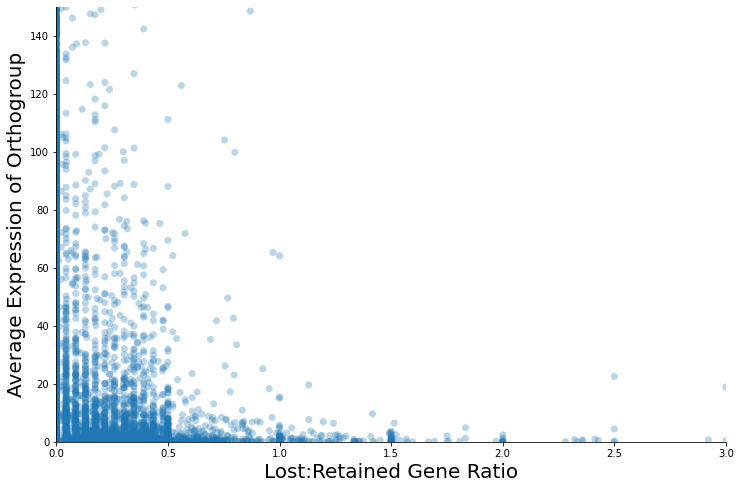

In [408]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
#ax = sns.stripplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'Mean Group Expression', jitter = .25, s = 6, color= 'tab:blue')
ax = sns.scatterplot(data = info_frame, x ='Specieswise Percent Genes Lost', y = 'Mean Expression', color= 'tab:blue', alpha = .3, s = 50, edgecolor = 'none')

plt.ylabel("Average Expression of Orthogroup", fontsize = 20)
plt.xlabel("Lost:Retained Gene Ratio", fontsize = 20)
sns.despine()
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,3))
plt.ylim((0, 150))
#plt.title("Genome wide evaluation of orthogorups shows \n that genes lost in some species are less expressed in species they remain in, ", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [392]:
info_frame['Species'].value_counts()

23    15936
2      6326
1      5204
22     2758
3      2624
4      1698
5      1190
21     1143
6       977
7       806
20      671
8       602
19      516
10      483
9       471
18      395
11      389
12      352
13      346
17      343
16      339
15      336
14      320
Name: Species, dtype: int64

In [393]:
non_zero_info_frame = info_frame.loc[info_frame['Specieswise Percent Genes Lost']>0]
non_zero_info_frame

,Species,Mode Number of Genes in Each Species,Median Genes Lost,Mean Genes Lost,Mean Expression,Percent Genes Lost,Specieswise Percent Genes Lost,Cumulative Genes Lost,Decile
Orthogroup,,,,,,,,,
OG0000000,23,72,-0.0,12.695652,0.810847,0.176329,2.322290,292.0,1.0
OG0000001,23,8,-0.0,0.956522,0.018016,0.119565,0.591304,22.0,1.0
OG0000002,23,29,-0.0,4.826087,0.000428,0.166417,0.821101,111.0,1.0
OG0000003,22,19,-0.0,5.347826,0.517587,0.281465,1.451102,123.0,1.0
OG0000005,23,37,14.0,13.521739,3.719769,0.365452,1.139697,311.0,1.0
...,...,...,...,...,...,...,...,...,...
OG0035142,2,2,2.0,1.869565,1.820548,0.934783,0.500000,43.0,NaN
OG0035145,2,2,2.0,1.869565,0.729358,0.934783,0.500000,43.0,NaN
OG0035149,2,2,2.0,1.869565,1.751195,0.934783,0.500000,43.0,NaN


In [402]:
non_zero_info_frame['Decile'] = pd.qcut(non_zero_info_frame['Specieswise Percent Genes Lost'], 10, labels = False, duplicates= 'drop')


/tmp/ipykernel_337153/3907028886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero_info_frame['Decile'] = pd.qcut(non_zero_info_frame['Specieswise Percent Genes Lost'], 10, labels = False, duplicates= 'drop')


In [403]:
non_zero_info_frame

,Species,Mode Number of Genes in Each Species,Median Genes Lost,Mean Genes Lost,Mean Expression,Percent Genes Lost,Specieswise Percent Genes Lost,Cumulative Genes Lost,Decile
Orthogroup,,,,,,,,,
OG0000000,23,72,-0.0,12.695652,0.810847,0.176329,2.322290,292.0,9
OG0000001,23,8,-0.0,0.956522,0.018016,0.119565,0.591304,22.0,8
OG0000002,23,29,-0.0,4.826087,0.000428,0.166417,0.821101,111.0,9
OG0000003,22,19,-0.0,5.347826,0.517587,0.281465,1.451102,123.0,9
OG0000005,23,37,14.0,13.521739,3.719769,0.365452,1.139697,311.0,9
...,...,...,...,...,...,...,...,...,...
OG0035142,2,2,2.0,1.869565,1.820548,0.934783,0.500000,43.0,7
OG0035145,2,2,2.0,1.869565,0.729358,0.934783,0.500000,43.0,7
OG0035149,2,2,2.0,1.869565,1.751195,0.934783,0.500000,43.0,7


Text(0.5, 1.0, 'Genome wide evaluation of orthogorups shows \n that genes lost in some species are less expressed in species they remain in, ')

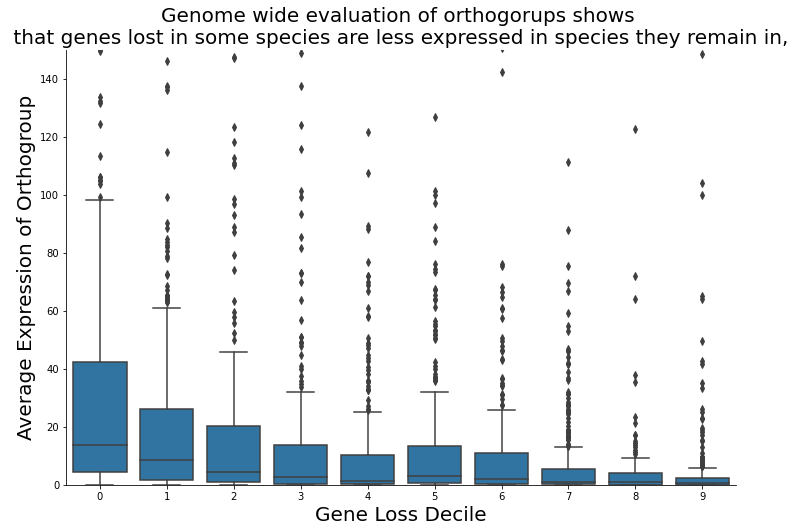

In [405]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
#ax = sns.stripplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'Mean Group Expression', jitter = .25, s = 6, color= 'tab:blue')
ax = sns.boxplot(data = non_zero_info_frame, x ='Decile', y = 'Mean Expression', color= 'tab:blue',)

plt.ylabel("Average Expression of Orthogroup", fontsize = 20)
plt.xlabel("Gene Loss Decile", fontsize = 20)
sns.despine()
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((0,100))
plt.ylim((0, 150))
plt.title("Genome wide evaluation of orthogorups shows \n that genes lost in some species are less expressed in species they remain in, ", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

Text(0.5, 1.0, 'Genome wide evaluation of orthogorups shows \n that genes lost in some species are less expressed in species they remain in, ')

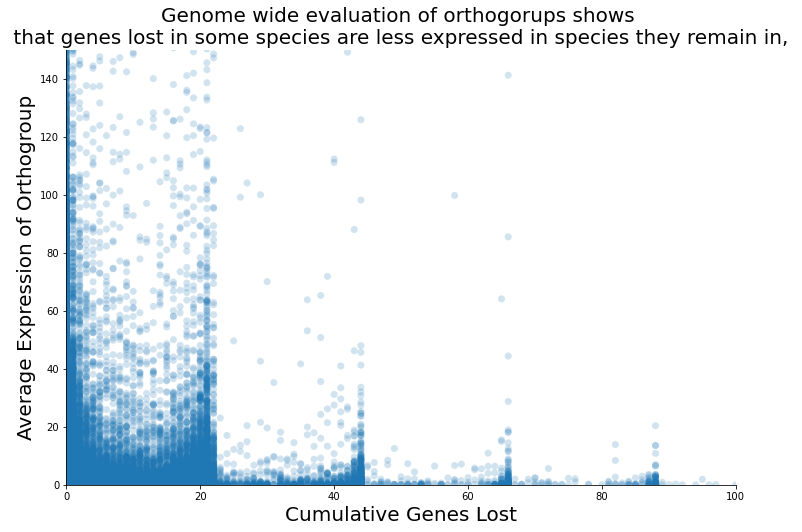

In [407]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
#ax = sns.stripplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'Mean Group Expression', jitter = .25, s = 6, color= 'tab:blue')
ax = sns.scatterplot(data = info_frame, x ='Cumulative Genes Lost', y = 'Mean Expression', color= 'tab:blue', alpha = .2, s = 50, edgecolor = 'none')

plt.ylabel("Average Expression of Orthogroup", fontsize = 20)
plt.xlabel("Cumulative Genes Lost", fontsize = 20)
sns.despine()
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,100))
plt.ylim((0, 150))
plt.title("Genome wide evaluation of orthogorups shows \n that genes lost in some species are less expressed in species they remain in, ", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

Text(0.5, 1.0, 'Orthogroups that experience gene loss more frequently are expressed at lower levels')

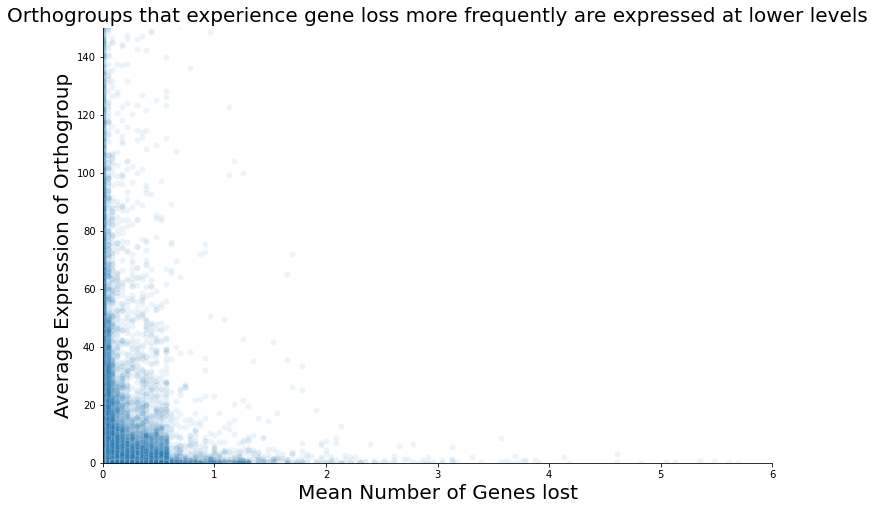

In [221]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
#ax = sns.stripplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'Mean Group Expression', jitter = .25, s = 6, color= 'tab:blue')
ax = sns.scatterplot(data = info_frame, x ='Mean Genes Lost', y = 'Mean Expression', color= 'tab:blue', alpha = .08)

plt.ylabel("Average Expression of Orthogroup", fontsize = 20)
plt.xlabel("Mean Number of Genes lost", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,6))
plt.ylim((0, 150))
plt.title("Orthogroups that experience gene loss more frequently are expressed at lower levels", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

Why are above orthogroups lower expressed if they lose avg of .5 genes vs 1 gene? Prescence abscence variaton - lost 1 whole gene = group of 2 that lost one or group of 5 that lost 1 ( 5 group useful to keep around?)

Text(0.5, 1.0, 'Orthogroups that experience gene loss more frequently are expressed at lower levels')

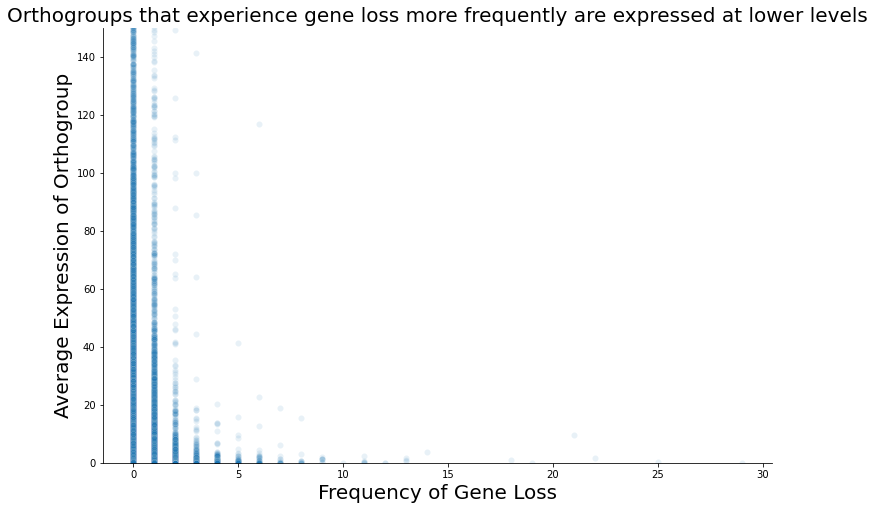

In [39]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
#ax = sns.stripplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'Mean Group Expression', jitter = .25, s = 6, color= 'tab:blue')
ax = sns.scatterplot(data = info_frame, x ='Median Genes Lost', y = 'Mean Expression', color= 'tab:blue', alpha = .1)

plt.ylabel("Average Expression of Orthogroup", fontsize = 20)
plt.xlabel("Frequency of Gene Loss", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((-7,7))
plt.ylim((0, 150))
plt.title("Orthogroups that experience gene loss more frequently are expressed at lower levels", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

Text(0.5, 1.0, 'Orthogroups that experience gene loss more frequently are expressed at lower levels')

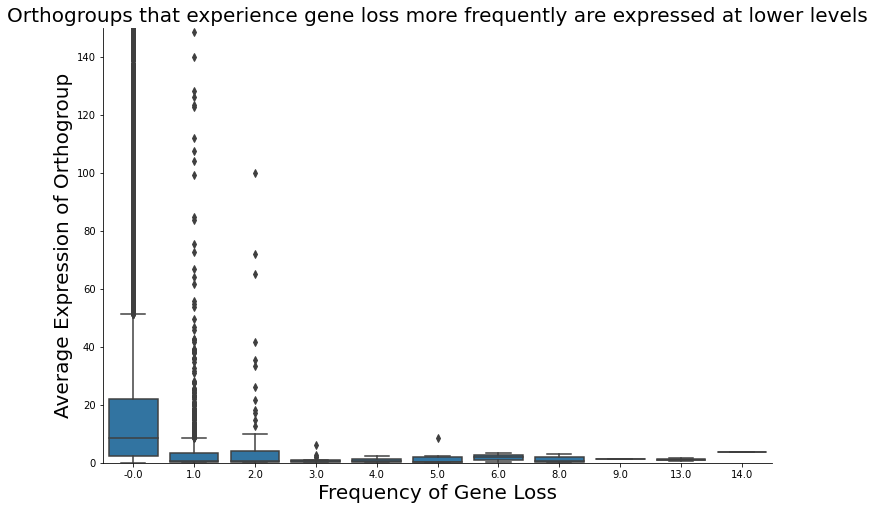

In [222]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
#ax = sns.stripplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'Mean Group Expression', jitter = .25, s = 6, color= 'tab:blue')
ax = sns.boxplot(data = info_frame, x ='Median Genes Lost', y = 'Mean Expression', color= 'tab:blue')

plt.ylabel("Average Expression of Orthogroup", fontsize = 20)
plt.xlabel("Frequency of Gene Loss", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((-7,7))
plt.ylim((0, 150))
plt.title("Orthogroups that experience gene loss more frequently are expressed at lower levels", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [51]:
ortho_groups_and_number_of_genes_present_in_each_species = pd.DataFrame(index = counts_paralogs.index)
for species in sample_names.iterrows():
    sample_id = species[1][1]
    species_id = species[1][0]
    current_list_of_genes = gene_ortho_map.loc[gene_ortho_map['Species'] == species_id]
    all_orthogroups_number_present = []
    for orthogroup in counts_paralogs.index:
        genes_in_orthogroup = current_list_of_genes.loc[current_list_of_genes['Orthogroup'] == orthogroup]
        numb_of_that_gene_in_species = len(genes_in_orthogroup)
        all_orthogroups_number_present.append(numb_of_that_gene_in_species)
    ortho_groups_and_number_of_genes_present_in_each_species[species_id] = all_orthogroups_number_present

NameError: name 'counts_paralogs' is not defined

In [100]:
ortho_expression_frame.mean(axis = 1)

Orthogroup
OG0000179       2.470112
OG0000411    3386.471373
OG0000412       8.549890
OG0000516      14.861063
OG0000572       1.242435
                ...     
OG0044289       0.000000
OG0044290       0.000000
OG0044291       0.000000
OG0044292       0.000000
OG0044293       0.000000
Length: 3762, dtype: float64

In [99]:
ortho_groups_and_number_of_genes_present_in_each_species

,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,mammosum,muricatum1,muricatum2,prinophyllum,pseudolulo,quitoense,robustum,stramoniifolium,torvum,violaceum
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000179,3,0,1,3,2,10,1,12,2,6,...,14,1,2,6,0,1,0,5,91,1
OG0000411,2,13,13,12,2,2,2,1,3,0,...,1,4,4,4,0,1,2,2,2,9
OG0000412,1,4,1,3,7,1,1,1,4,2,...,9,1,0,4,0,4,1,2,1,16
OG0000516,0,2,10,2,11,3,2,3,2,4,...,4,2,2,2,0,10,2,6,2,2
OG0000572,8,1,10,1,2,2,1,10,0,4,...,2,6,5,1,0,2,7,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
OG0044290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
OG0044291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [101]:
ortho_groups_and_number_of_genes_present_in_each_species['Frequency of Gene Loss'] = (ortho_groups_and_number_of_genes_present_in_each_species <2).sum(axis = 1)

In [102]:
ortho_groups_and_number_of_genes_present_in_each_species

,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,muricatum1,muricatum2,prinophyllum,pseudolulo,quitoense,robustum,stramoniifolium,torvum,violaceum,Frequency of Gene Loss
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000179,3,0,1,3,2,10,1,12,2,6,...,1,2,6,0,1,0,5,91,1,9
OG0000411,2,13,13,12,2,2,2,1,3,0,...,4,4,4,0,1,2,2,2,9,5
OG0000412,1,4,1,3,7,1,1,1,4,2,...,1,0,4,0,4,1,2,1,16,10
OG0000516,0,2,10,2,11,3,2,3,2,4,...,2,2,2,0,10,2,6,2,2,2
OG0000572,8,1,10,1,2,2,1,10,0,4,...,6,5,1,0,2,7,2,6,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,22
OG0044290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,22
OG0044291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,22


In [103]:
ortho_groups_and_number_of_genes_present_in_each_species['Mean Group Expression'] = ortho_expression_frame.mean(axis = 1)
ortho_groups_and_number_of_genes_present_in_each_species

,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,muricatum2,prinophyllum,pseudolulo,quitoense,robustum,stramoniifolium,torvum,violaceum,Frequency of Gene Loss,Mean Group Expression
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000179,3,0,1,3,2,10,1,12,2,6,...,2,6,0,1,0,5,91,1,9,2.470112
OG0000411,2,13,13,12,2,2,2,1,3,0,...,4,4,0,1,2,2,2,9,5,3386.471373
OG0000412,1,4,1,3,7,1,1,1,4,2,...,0,4,0,4,1,2,1,16,10,8.549890
OG0000516,0,2,10,2,11,3,2,3,2,4,...,2,2,0,10,2,6,2,2,2,14.861063
OG0000572,8,1,10,1,2,2,1,10,0,4,...,5,1,0,2,7,2,6,1,9,1.242435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,22,0.000000
OG0044290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,22,0.000000
OG0044291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,22,0.000000


In [ ]:
paralog_count

In [92]:
paralog_count.loc[paralog_count['Num Genes'] <2].value_counts(subset = 'Orthogroup')

Orthogroup
OG0001274    13
OG0003334    12
OG0001982    12
OG0003430    12
OG0003424    12
             ..
OG0001836     1
OG0001837     1
OG0001841     1
OG0001845     1
OG0032047     1
Length: 2427, dtype: int64

In [54]:
sample_id

'M82'

In [4]:
hamsini_table.columns

Index(['Gene1', 'Gene2', 'OGs', 'coexp_atlas', 'coexp_tissue', 'FC_atlas',
       'spec_atlas', 'FC_tissue', 'spec_tissue', 'numtissue_atlas',
       'new_coexp_atlas', 'log2FC_min_atlas', 'log2FC_max_atlas',
       'log2FC_mean_atlas', 'log2FC_sd_atlas', 'numtissue_tissue',
       'new_coexp_tissue', 'log2FC_min_tissue', 'log2FC_max_tissue',
       'log2FC_mean_tissue', 'log2FC_sd_tissue'],
      dtype='object')

In [5]:
hamsini_table[['numtissue_atlas']]

,numtissue_atlas
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
25342,12.0
25343,NaN
25344,NaN
25345,2.0


In [6]:
hamsini_shortlist = hamsini_table.loc[(hamsini_table['coexp_atlas'] >.7) &(hamsini_table['numtissue_atlas'] > 3)&(hamsini_table['log2FC_mean_atlas']>1)&(hamsini_table['log2FC_sd_atlas']<.5)]

In [7]:
hamsini_shortlist

,Gene1,Gene2,OGs,coexp_atlas,coexp_tissue,FC_atlas,spec_atlas,FC_tissue,spec_tissue,numtissue_atlas,...,log2FC_min_atlas,log2FC_max_atlas,log2FC_mean_atlas,log2FC_sd_atlas,numtissue_tissue,new_coexp_tissue,log2FC_min_tissue,log2FC_max_tissue,log2FC_mean_tissue,log2FC_sd_tissue
1508,Solyc04g011390,Solyc05g054610,OG0000026,0.998242,0.997688,0.899756,0.845550,0.998674,0.998742,17.0,...,1.645516,3.542327,2.360036,0.445612,11.0,0.986632,-1.000000,1.589492,0.850125,0.935544
1517,Solyc04g011390,Solyc11g072840,OG0000026,0.998675,0.995199,0.899786,0.845638,0.997816,0.997125,16.0,...,0.885063,2.489958,1.304373,0.468712,9.0,0.977245,3.095924,4.206383,3.592003,0.447899
1543,Solyc06g005430,Solyc11g066160,OG0000026,0.997317,0.985899,0.898173,0.826985,0.994256,0.996720,17.0,...,2.510119,4.043955,3.160603,0.424230,11.0,0.949132,0.181838,3.514573,1.281371,1.172641
1559,Solyc06g075850,Solyc06g075930,OG0000026,0.998907,0.995509,0.898090,0.748409,0.998243,0.999079,17.0,...,1.095467,2.390936,1.816379,0.413969,11.0,0.977422,0.459432,4.426265,1.842428,1.202599
3121,Solyc01g074000,Solyc01g080600,OG0000033,0.997613,0.882802,0.898274,0.796348,0.934411,0.911762,13.0,...,3.471106,4.672119,4.364960,0.335908,2.0,1.000000,8.917159,8.986980,8.952069,0.049371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24622,Solyc06g083090,Solyc06g083100,OG0006221,0.959889,0.692153,0.822121,0.844025,0.822639,0.690808,8.0,...,1.728475,2.929909,2.042617,0.370602,1.0,NaN,5.321928,5.321928,5.321928,NaN
24726,Solyc11g008110,Solyc11g020180,OG0008314,0.988990,0.463262,0.947735,0.898457,0.297676,0.148351,7.0,...,1.725931,2.383131,2.085396,0.241926,1.0,NaN,-1.000000,-1.000000,-1.000000,NaN
24744,Solyc12g098463,Solyc12g098467,OG0008506,0.939124,0.980108,0.979775,0.996383,0.995865,0.996091,17.0,...,2.933543,4.389846,3.871429,0.389279,12.0,0.939008,-1.584963,-0.316027,-1.068042,0.337460
24940,Solyc06g009420,Solyc06g009490,OG0023112,0.990981,NaN,0.897916,0.878454,NaN,NaN,6.0,...,2.547099,3.370331,2.958930,0.330099,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
ultra_shortlist = hamsini_shortlist.drop_duplicates(subset = 'OGs')

In [8]:
list_of_orthogroups_with_fc_thresholded_tomato = list(set(hamsini_shortlist['OGs']))

In [9]:
orthogroups = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Orthology_Tables/Orthogroups.tsv', sep = '\t')

In [10]:
ortho_col_name_converter = {'Aethiopicum':'Solaet3_3.0.4','Candidum':'Solcan1_1.0.4','Macrocarpon':'Solmac3_3.0.4','Muricatum 1':'Solmur2hap1_2.0.4','Muricatum 2':'Solmur2hap2_2.0.4','Prinophyllum':'Solpri1_2.0.4','Quitoense':'Solqui2_2.0.4'}
ortho_group_dictionary_of_gene_groups = {}
for species in ortho_col_name_converter.keys():
    current_ortho_df = orthogroups[['Orthogroup',ortho_col_name_converter[species]]]
    current_ortho_df = current_ortho_df.dropna()
    df_conversion_base = []
    list_of_lenghts = []
    for Orthogroup_row in current_ortho_df.iterrows():
        current_orthogroup = Orthogroup_row[1][0]
        current_list_of_genes_in_group = Orthogroup_row[1][1].replace(" ",'').split(',')
        list_of_lenghts.append(len(current_list_of_genes_in_group))
        if len(current_list_of_genes_in_group) >30 or len(current_list_of_genes_in_group) == 1:
            continue
        orthogroup_list = [current_orthogroup]*len(current_list_of_genes_in_group)
        zipped_list = zip(orthogroup_list, current_list_of_genes_in_group)
        df_conversion_base.extend(list(zipped_list))
        final_long_df = pd.DataFrame(data=df_conversion_base, columns = ['Orthogroup','Gene'])
        ortho_group_dictionary_of_gene_groups[species]=final_long_df

In [11]:
ortho_groups_and_number_of_genes_present_in_each_species = pd.DataFrame(index = list_of_orthogroups_with_fc_thresholded_tomato)
for species in ortho_group_dictionary_of_gene_groups.keys():
    current_list_of_genes = ortho_group_dictionary_of_gene_groups[species]
    all_orthogroups_number_present = []
    for orthogroup in list_of_orthogroups_with_fc_thresholded_tomato:
        genes_in_orthogroup = current_list_of_genes.loc[current_list_of_genes['Orthogroup'] == orthogroup]
        numb_of_that_gene_in_species = len(genes_in_orthogroup)
        all_orthogroups_number_present.append(numb_of_that_gene_in_species)
    ortho_groups_and_number_of_genes_present_in_each_species[species] = all_orthogroups_number_present



In [12]:
ortho_groups_and_number_of_genes_present_in_each_species #### OG0002827	 is very cool! Lost in Aethiopicum, OG0005089 is lost in everything but tomato

,Aethiopicum,Candidum,Macrocarpon,Muricatum 1,Muricatum 2,Prinophyllum,Quitoense
OG0004518,2,0,0,0,0,0,0
OG0002370,2,2,2,2,2,2,2
OG0004746,0,0,0,2,0,0,0
OG0002282,2,2,2,2,2,2,2
OG0004745,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
OG0000909,3,3,3,2,3,3,4
OG0002609,2,2,2,2,2,2,0
OG0002146,2,2,2,2,2,2,2
OG0005350,0,0,0,0,0,0,0


In [13]:
ortho_groups_and_number_of_genes_present_in_each_species ==2 

,Aethiopicum,Candidum,Macrocarpon,Muricatum 1,Muricatum 2,Prinophyllum,Quitoense
OG0004518,True,False,False,False,False,False,False
OG0002370,True,True,True,True,True,True,True
OG0004746,False,False,False,True,False,False,False
OG0002282,True,True,True,True,True,True,True
OG0004745,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
OG0000909,False,False,False,True,False,False,False
OG0002609,True,True,True,True,True,True,False
OG0002146,True,True,True,True,True,True,True
OG0005350,False,False,False,False,False,False,False


In [14]:
species_rna_locations ={'Aethiopicum':'/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Aetheopicum/fpkm_normalized_combined_samples.tsv',
    'Candidum':'/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Candidum/fpkm_normalized_combined_samples.tsv',
    'Macrocarpon':'/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Macrocarpon/fpkm_normalized_combined_samples.tsv',
    'Muricatum 1':'/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_muricatum/haplotype_1/fpkm_normalized_combined_samples.tsv',
    'Muricatum 2':'/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_muricatum/haplotype_2/fpkm_normalized_combined_samples.tsv',
    'Prinophyllum':'/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Prinophyllum/fpkm_normalized_combined_samples.tsv',
    'Quitoense':'/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Quitoense/fpkm_normalized_combined_samples.tsv'}

In [15]:
rna_normalized_data = {}
for species in species_rna_locations.keys():
    current_rna_location = species_rna_locations[species]
    current_sample = pd.read_csv(current_rna_location, sep = '\t', index_col= 0)
    current_sample.index = current_sample.index+".1"
    current_sample['Mean'] = current_sample.mean(axis =1)

    rna_normalized_data[species] = current_sample

In [16]:
q_Data = rna_normalized_data['Quitoense']

In [17]:
q_Data.loc[q_Data['Mean']!= 0]

,Rep 1,Rep 2,Mean
FEATURE_ID,,,
Solqui2.Cg000010.1,0.154825,0.028682,0.091754
Solqui2.Cg000020.1,0.088258,0.122627,0.105443
Solqui2.Cg000050.1,0.186422,0.621646,0.404034
Solqui2.Cg000060.1,0.101622,0.169435,0.135528
Solqui2.Cg000070.1,0.537335,0.656994,0.597164
...,...,...,...
Solqui2.ctg00000691g000010.1,0.023048,0.076856,0.049952
ncRNA_Solqui2.ctg00000739g003721.1,4.515794,0.721979,2.618887
ncRNA_Solqui2.ctg00000739g003731.1,0.056387,0.000000,0.028193


In [18]:
genes_in_orthogroup.merge(right = q_Data, left_on = 'Gene', right_index=True).mean()['Mean']

nan

In [19]:
ortho_groups_and_number_of_genes_present_in_each_species = pd.DataFrame(index = list_of_orthogroups_with_fc_thresholded_tomato)
ortho_groups_avg_expression_in_each_species = pd.DataFrame(index = list_of_orthogroups_with_fc_thresholded_tomato)
for species in ortho_group_dictionary_of_gene_groups.keys():
    current_list_of_genes = ortho_group_dictionary_of_gene_groups[species]
    all_orthogroups_number_present = []
    all_orthogroups_avg_expression = []
    rna_data_for_species = rna_normalized_data[species]
    for orthogroup in list_of_orthogroups_with_fc_thresholded_tomato:
        genes_in_orthogroup = current_list_of_genes.loc[current_list_of_genes['Orthogroup'] == orthogroup]
        merged_genes_with_reads = genes_in_orthogroup.merge(right = rna_data_for_species, left_on = 'Gene', right_index=True)
        avg_of_all_genes = merged_genes_with_reads[['Mean']].mean()['Mean']
        merged_genes_no_zeros = merged_genes_with_reads.loc[merged_genes_with_reads['Mean']!= 0]
        numb_of_that_gene_in_species = len(merged_genes_no_zeros)
        all_orthogroups_number_present.append(numb_of_that_gene_in_species)
        all_orthogroups_avg_expression.append(avg_of_all_genes)

    ortho_groups_and_number_of_genes_present_in_each_species[species] = all_orthogroups_number_present
    ortho_groups_avg_expression_in_each_species[species] = all_orthogroups_avg_expression

In [20]:
ortho_groups_and_number_of_genes_present_in_each_species['Frequency of Gene Loss'] = (ortho_groups_and_number_of_genes_present_in_each_species <2).sum(axis = 1)

In [21]:
ortho_groups_and_number_of_genes_present_in_each_species

,Aethiopicum,Candidum,Macrocarpon,Muricatum 1,Muricatum 2,Prinophyllum,Quitoense,Frequency of Gene Loss
OG0004518,2,0,0,0,0,0,0,6
OG0002370,2,2,2,2,2,2,2,0
OG0004746,0,0,0,2,0,0,0,6
OG0002282,2,2,2,2,2,2,2,0
OG0004745,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...
OG0000909,3,3,3,2,3,3,4,0
OG0002609,2,2,2,2,2,2,0,1
OG0002146,2,2,2,2,2,2,2,0
OG0005350,0,0,0,0,0,0,0,7


In [22]:
ortho_groups_and_number_of_genes_present_in_each_species['Mean Group Expression'] = ortho_groups_avg_expression_in_each_species.mean(axis = 1)
ortho_groups_and_number_of_genes_present_in_each_species

,Aethiopicum,Candidum,Macrocarpon,Muricatum 1,Muricatum 2,Prinophyllum,Quitoense,Frequency of Gene Loss,Mean Group Expression
OG0004518,2,0,0,0,0,0,0,6,5.196501
OG0002370,2,2,2,2,2,2,2,0,34.298456
OG0004746,0,0,0,2,0,0,0,6,47.304014
OG0002282,2,2,2,2,2,2,2,0,22.543973
OG0004745,0,0,0,0,0,0,0,7,NaN
...,...,...,...,...,...,...,...,...,...
OG0000909,3,3,3,2,3,3,4,0,292.574212
OG0002609,2,2,2,2,2,2,0,1,25.863955
OG0002146,2,2,2,2,2,2,2,0,18.646802
OG0005350,0,0,0,0,0,0,0,7,NaN


NameError: name 'ortho_groups_and_number_of_genes_present_in_each_species' is not defined

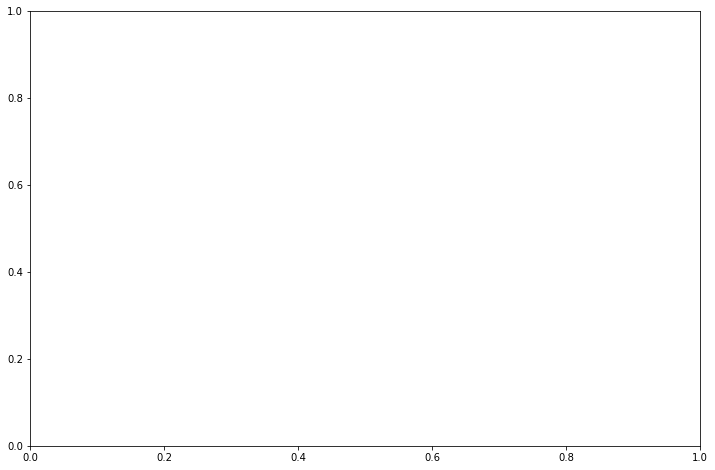

In [122]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
#ax = sns.stripplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'Mean Group Expression', jitter = .25, s = 6, color= 'tab:blue')
ax = sns.boxplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'Mean Group Expression', color= 'tab:blue')

plt.ylabel("Average Expression of Orthogroup", fontsize = 20)
plt.xlabel("Frequency of Gene Loss", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((-7,7))
plt.ylim((0, 100))
plt.title("Orthogroups that experience gene loss more frequently are expressed at lower levels", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

Text(0.5, 1.0, 'Orthogroups that experience gene loss more frequently are expressed at lower levels')

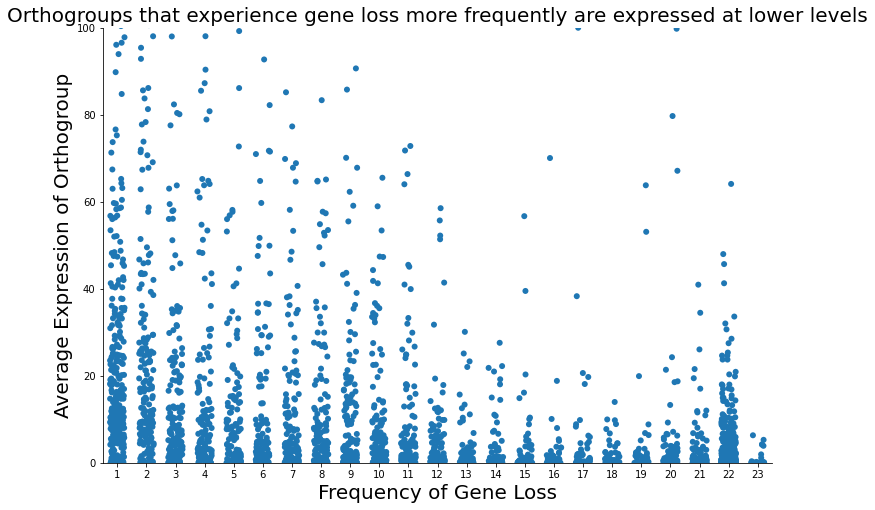

In [114]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.stripplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'Mean Group Expression', jitter = .25, s = 6, color= 'tab:blue')
#ax = sns.boxplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'Mean Group Expression', color= 'tab:blue')

plt.ylabel("Average Expression of Orthogroup", fontsize = 20)
plt.xlabel("Frequency of Gene Loss", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((-7,7))
plt.ylim((0, 100))
plt.title("Orthogroups that experience gene loss more frequently are expressed at lower levels", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

#### Check for tomato paralogs FC vs Frequency of gene loss, in tissue specific in other notebook check for how often the paralog pair "flips" - one at zero the other high, between replicates

In [23]:
averaged_hamsini_shorlist = hamsini_shortlist.groupby('OGs').mean()

/tmp/ipykernel_2535444/862986761.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averaged_hamsini_shorlist = hamsini_shortlist.groupby('OGs').mean()


In [24]:
averaged_hamsini_shorlist

,coexp_atlas,coexp_tissue,FC_atlas,spec_atlas,FC_tissue,spec_tissue,numtissue_atlas,new_coexp_atlas,log2FC_min_atlas,log2FC_max_atlas,log2FC_mean_atlas,log2FC_sd_atlas,numtissue_tissue,new_coexp_tissue,log2FC_min_tissue,log2FC_max_tissue,log2FC_mean_tissue,log2FC_sd_tissue
OGs,,,,,,,,,,,,,,,,,,
OG0000026,0.998285,0.993574,0.898951,0.816646,0.997247,0.997916,16.75,0.990954,1.534041,3.116794,2.160348,0.438131,10.500000,0.972608,0.684299,3.434178,1.891482,0.939671
OG0000033,0.997613,0.882802,0.898274,0.796348,0.934411,0.911762,13.00,0.977798,3.471106,4.672119,4.364960,0.335908,2.000000,1.000000,8.917159,8.986980,8.952069,0.049371
OG0000036,0.913939,0.994679,0.957427,0.957967,0.982071,0.971651,17.00,0.714344,3.424157,4.909658,4.014056,0.441753,12.000000,0.976230,-2.321928,1.691236,0.505026,1.179257
OG0000040,0.990990,0.989395,0.948935,0.896823,0.979978,0.969120,17.00,0.955833,1.394612,3.085836,2.067478,0.422450,10.333333,0.953115,-0.659985,1.744110,0.560098,0.691736
OG0000074,0.943316,0.985640,0.981471,0.984580,0.960984,0.942815,17.00,0.814320,1.247583,2.467877,1.850599,0.373107,12.000000,0.960658,-0.193844,2.428370,0.757680,0.911396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0006221,0.959889,0.692153,0.822121,0.844025,0.822639,0.690808,8.00,0.827618,1.728475,2.929909,2.042617,0.370602,1.000000,NaN,5.321928,5.321928,5.321928,NaN
OG0008314,0.988990,0.463262,0.947735,0.898457,0.297676,0.148351,7.00,0.391873,1.725931,2.383131,2.085396,0.241926,1.000000,NaN,-1.000000,-1.000000,-1.000000,NaN
OG0008506,0.939124,0.980108,0.979775,0.996383,0.995865,0.996091,17.00,0.786237,2.933543,4.389846,3.871429,0.389279,12.000000,0.939008,-1.584963,-0.316027,-1.068042,0.337460


In [25]:
ortho_groups_and_number_of_genes_present_in_each_species = ortho_groups_and_number_of_genes_present_in_each_species.merge(averaged_hamsini_shorlist[['numtissue_atlas']], left_index= True, right_index=True)
ortho_groups_and_number_of_genes_present_in_each_species

,Aethiopicum,Candidum,Macrocarpon,Muricatum 1,Muricatum 2,Prinophyllum,Quitoense,Frequency of Gene Loss,Mean Group Expression,numtissue_atlas
OG0004518,2,0,0,0,0,0,0,6,5.196501,10.0
OG0002370,2,2,2,2,2,2,2,0,34.298456,17.0
OG0004746,0,0,0,2,0,0,0,6,47.304014,17.0
OG0002282,2,2,2,2,2,2,2,0,22.543973,17.0
OG0004745,0,0,0,0,0,0,0,7,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...
OG0000909,3,3,3,2,3,3,4,0,292.574212,17.0
OG0002609,2,2,2,2,2,2,0,1,25.863955,17.0
OG0002146,2,2,2,2,2,2,2,0,18.646802,17.0
OG0005350,0,0,0,0,0,0,0,7,NaN,17.0


Text(0.5, 1.0, 'Orthogroups that experience gene loss more frequently are expressed at lower levels')

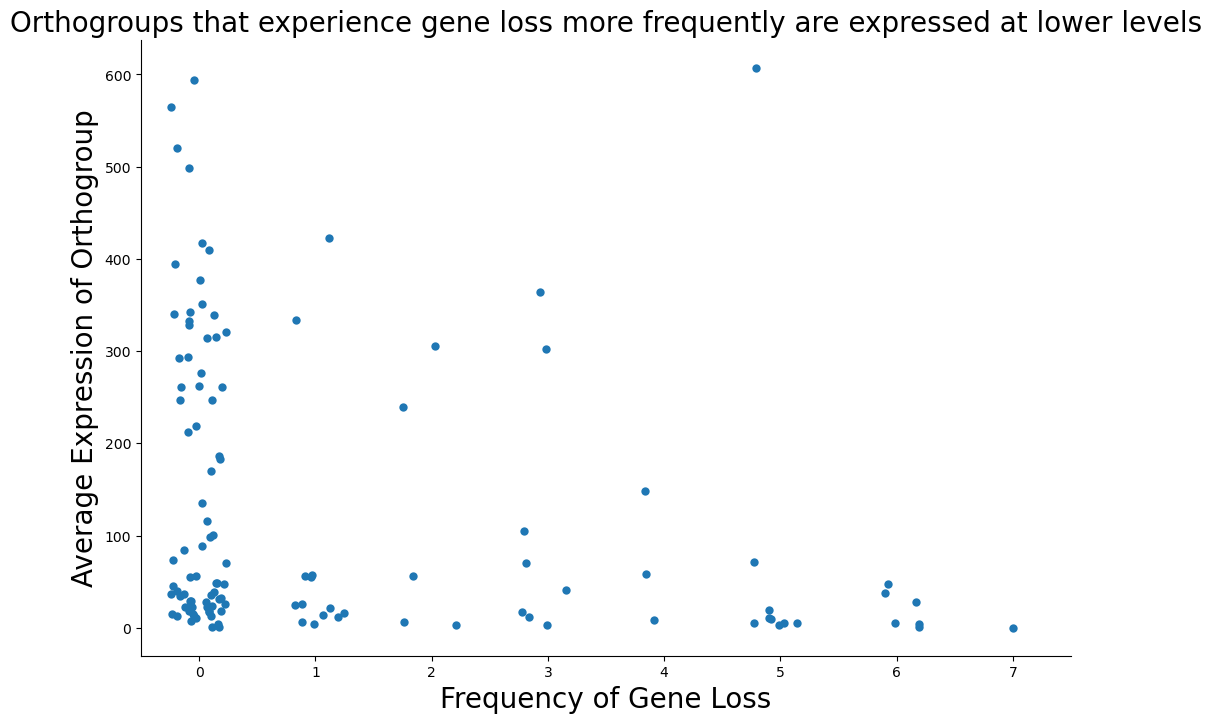

In [26]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.stripplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'Mean Group Expression', jitter = .25, s = 6)
plt.ylabel("Average Expression of Orthogroup", fontsize = 20)
plt.xlabel("Frequency of Gene Loss", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
plt.title("Orthogroups that experience gene loss more frequently are expressed at lower levels", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [27]:
ortho_groups_and_number_of_genes_present_in_each_species.loc[ortho_groups_and_number_of_genes_present_in_each_species['Frequency of Gene Loss'] == 5]

,Aethiopicum,Candidum,Macrocarpon,Muricatum 1,Muricatum 2,Prinophyllum,Quitoense,Frequency of Gene Loss,Mean Group Expression,numtissue_atlas
OG0002916,0,0,0,2,3,0,0,5,607.297020,17.0
OG0003928,0,2,0,0,0,0,2,5,19.007068,17.0
OG0003623,0,0,0,0,0,3,2,5,5.051115,13.0
OG0004456,0,0,0,2,2,0,0,5,71.473047,17.0
OG0003777,2,0,2,0,0,1,0,5,9.102651,17.0
OG0001389,1,1,2,1,1,2,1,5,3.205305,12.0
OG0004203,0,0,2,2,0,0,0,5,4.766507,15.0
OG0004207,0,2,0,0,0,0,2,5,10.873513,10.0
OG0002371,0,0,0,5,7,0,0,5,5.535660,5.0


In [28]:
hamsini_table.loc[hamsini_table['OGs'] =='OG0002916']

,Gene1,Gene2,OGs,coexp_atlas,coexp_tissue,FC_atlas,spec_atlas,FC_tissue,spec_tissue,numtissue_atlas,...,log2FC_min_atlas,log2FC_max_atlas,log2FC_mean_atlas,log2FC_sd_atlas,numtissue_tissue,new_coexp_tissue,log2FC_min_tissue,log2FC_max_tissue,log2FC_mean_tissue,log2FC_sd_tissue
22901,Solyc01g006160,Solyc01g016470,OG0002916,0.985787,0.980717,0.976523,0.975551,0.959994,0.937371,17.0,...,1.301337,2.557329,1.719172,0.302994,12.0,0.940311,1.028561,7.112005,2.973675,2.395045
22902,Solyc01g006160,Solyc01g104370,OG0002916,0.981593,0.992898,0.994411,0.995511,0.983864,0.974032,17.0,...,0.691956,1.613447,1.149202,0.269535,12.0,0.970568,-0.460014,5.317413,1.113008,2.431658
22903,Solyc01g016470,Solyc01g104370,OG0002916,0.962277,0.997757,0.983468,0.986403,0.991141,0.991958,17.0,...,-1.293867,-0.187576,-0.569970,0.321367,12.0,0.988035,-2.559550,-1.415037,-1.860667,0.385346


<AxesSubplot:xlabel='Frequency of Gene Loss', ylabel='numtissue_atlas'>

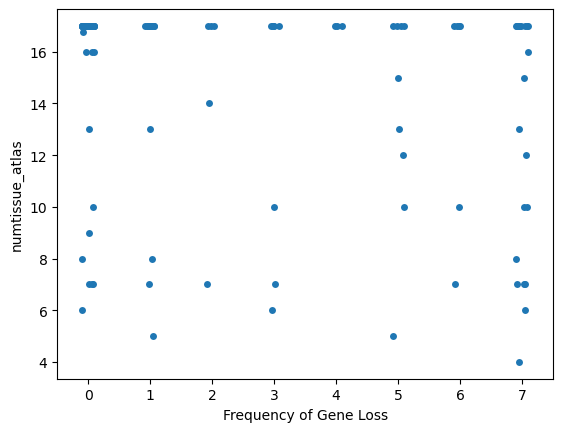

In [54]:
sns.stripplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'numtissue_atlas',)

In [55]:
#### 1 or zero represents loss vs tomato 
#### Find lost 

In [68]:
(ortho_groups_and_number_of_genes_present_in_each_species <3).all(axis = 1)

OG0002827     True
OG0005089     True
OG0001699    False
OG0000192    False
OG0000040    False
             ...  
OG0000909    False
OG0001962     True
OG0001389     True
OG0002386     True
OG0001059    False
Length: 139, dtype: bool

In [69]:
ortho_groups_and_number_of_genes_present_in_each_species.loc[(ortho_groups_and_number_of_genes_present_in_each_species <3).all(axis = 1)]

,Aethiopicum,Candidum,Macrocarpon,Muricatum 1,Muricatum 2,Prinophyllum,Quitoense
OG0002827,0,2,2,2,2,2,2
OG0005089,0,0,0,0,0,0,0
OG0005408,0,0,0,0,0,0,0
OG0023112,0,0,0,0,0,0,0
OG0002577,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
OG0003580,0,0,2,2,2,2,0
OG0004370,0,0,0,0,0,0,0
OG0001962,2,2,2,2,2,2,1
OG0001389,1,1,2,1,1,2,1


(0.0, 1000.0)

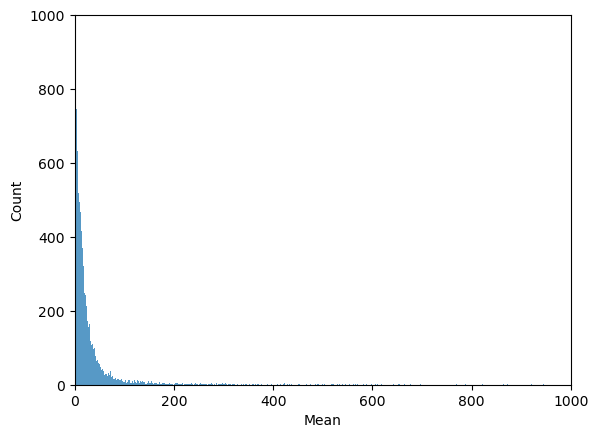

In [35]:
sns.histplot(rna_normalized_data["Quitoense"]['Mean'])
plt.xlim((0,1000))
plt.ylim((0,1000))

In [ ]:
### Block for when groups are bigger than 2
# list_of_gene_pairs_in_ortho_group = []
# for ortho in set(quitoense_long_df['Orthogroup']):
#     matched_long_df = quitoense_long_df.loc[quitoense_long_df['Orthogroup'] == ortho]
#     all_combinations_in_orthogroup = list(itertools.combinations(matched_long_df['Gene'].to_list(),2))
#     list_of_gene_pairs_in_ortho_group.extend(all_combinations_in_orthogroup)